## Problem statement

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Third-Phase-Practice-Projects\Glass Identification\Glass identification.csv",names=['id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass Type'])
df

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### Columns

In [3]:
df.columns

Index(['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Glass Type'],
      dtype='object')

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1- building_windows_float_processed
    - 2- building_windows_non_float_processed
    - 3- vehicle_windows_float_processed
    - 4- vehicle_windows_non_float_processed (none in this database)
    - 5- containers
    - 6- tableware
    - 7- headlamps


There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

In [4]:
df['Glass Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass Type, dtype: int64

In [5]:
df['Glass Type'].replace({1:0,2:0,3:0,5:1,6:1,7:1},inplace=True)

In [6]:
df['Glass Type'].value_counts()

0    163
1     51
Name: Glass Type, dtype: int64

##### Now

- 0 : window glass (classes 1-4)
- 1 : non-window glass (classes 5-7)

### Analysing basic metrics

In [7]:
df.shape

(214, 11)

In [8]:
df.isna().sum()

id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass Type    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass Type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [10]:
df.nunique()

id            214
RI            178
Na            142
Mg             94
Al            118
Si            133
K              65
Ca            143
Ba             34
Fe             32
Glass Type      2
dtype: int64

### Findings

1. There are no Null values
2. There are no white spaces since all values are numeric
3. All labels except id are continous

##### we can remove id column since it is almost same as index column

In [11]:
df.drop(columns='id',inplace=True)

In [12]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [13]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


### FINDING
- Right skewed (mean > median)
    - Ca
    - Ba
    - Fe

- LEFT skewed (mean < median)
    - Mg
- in case of K,Ca,Ba,Fe There is high difference between 3rd quartile and max data indicating presence of outlier


### Graphical univariate analysis

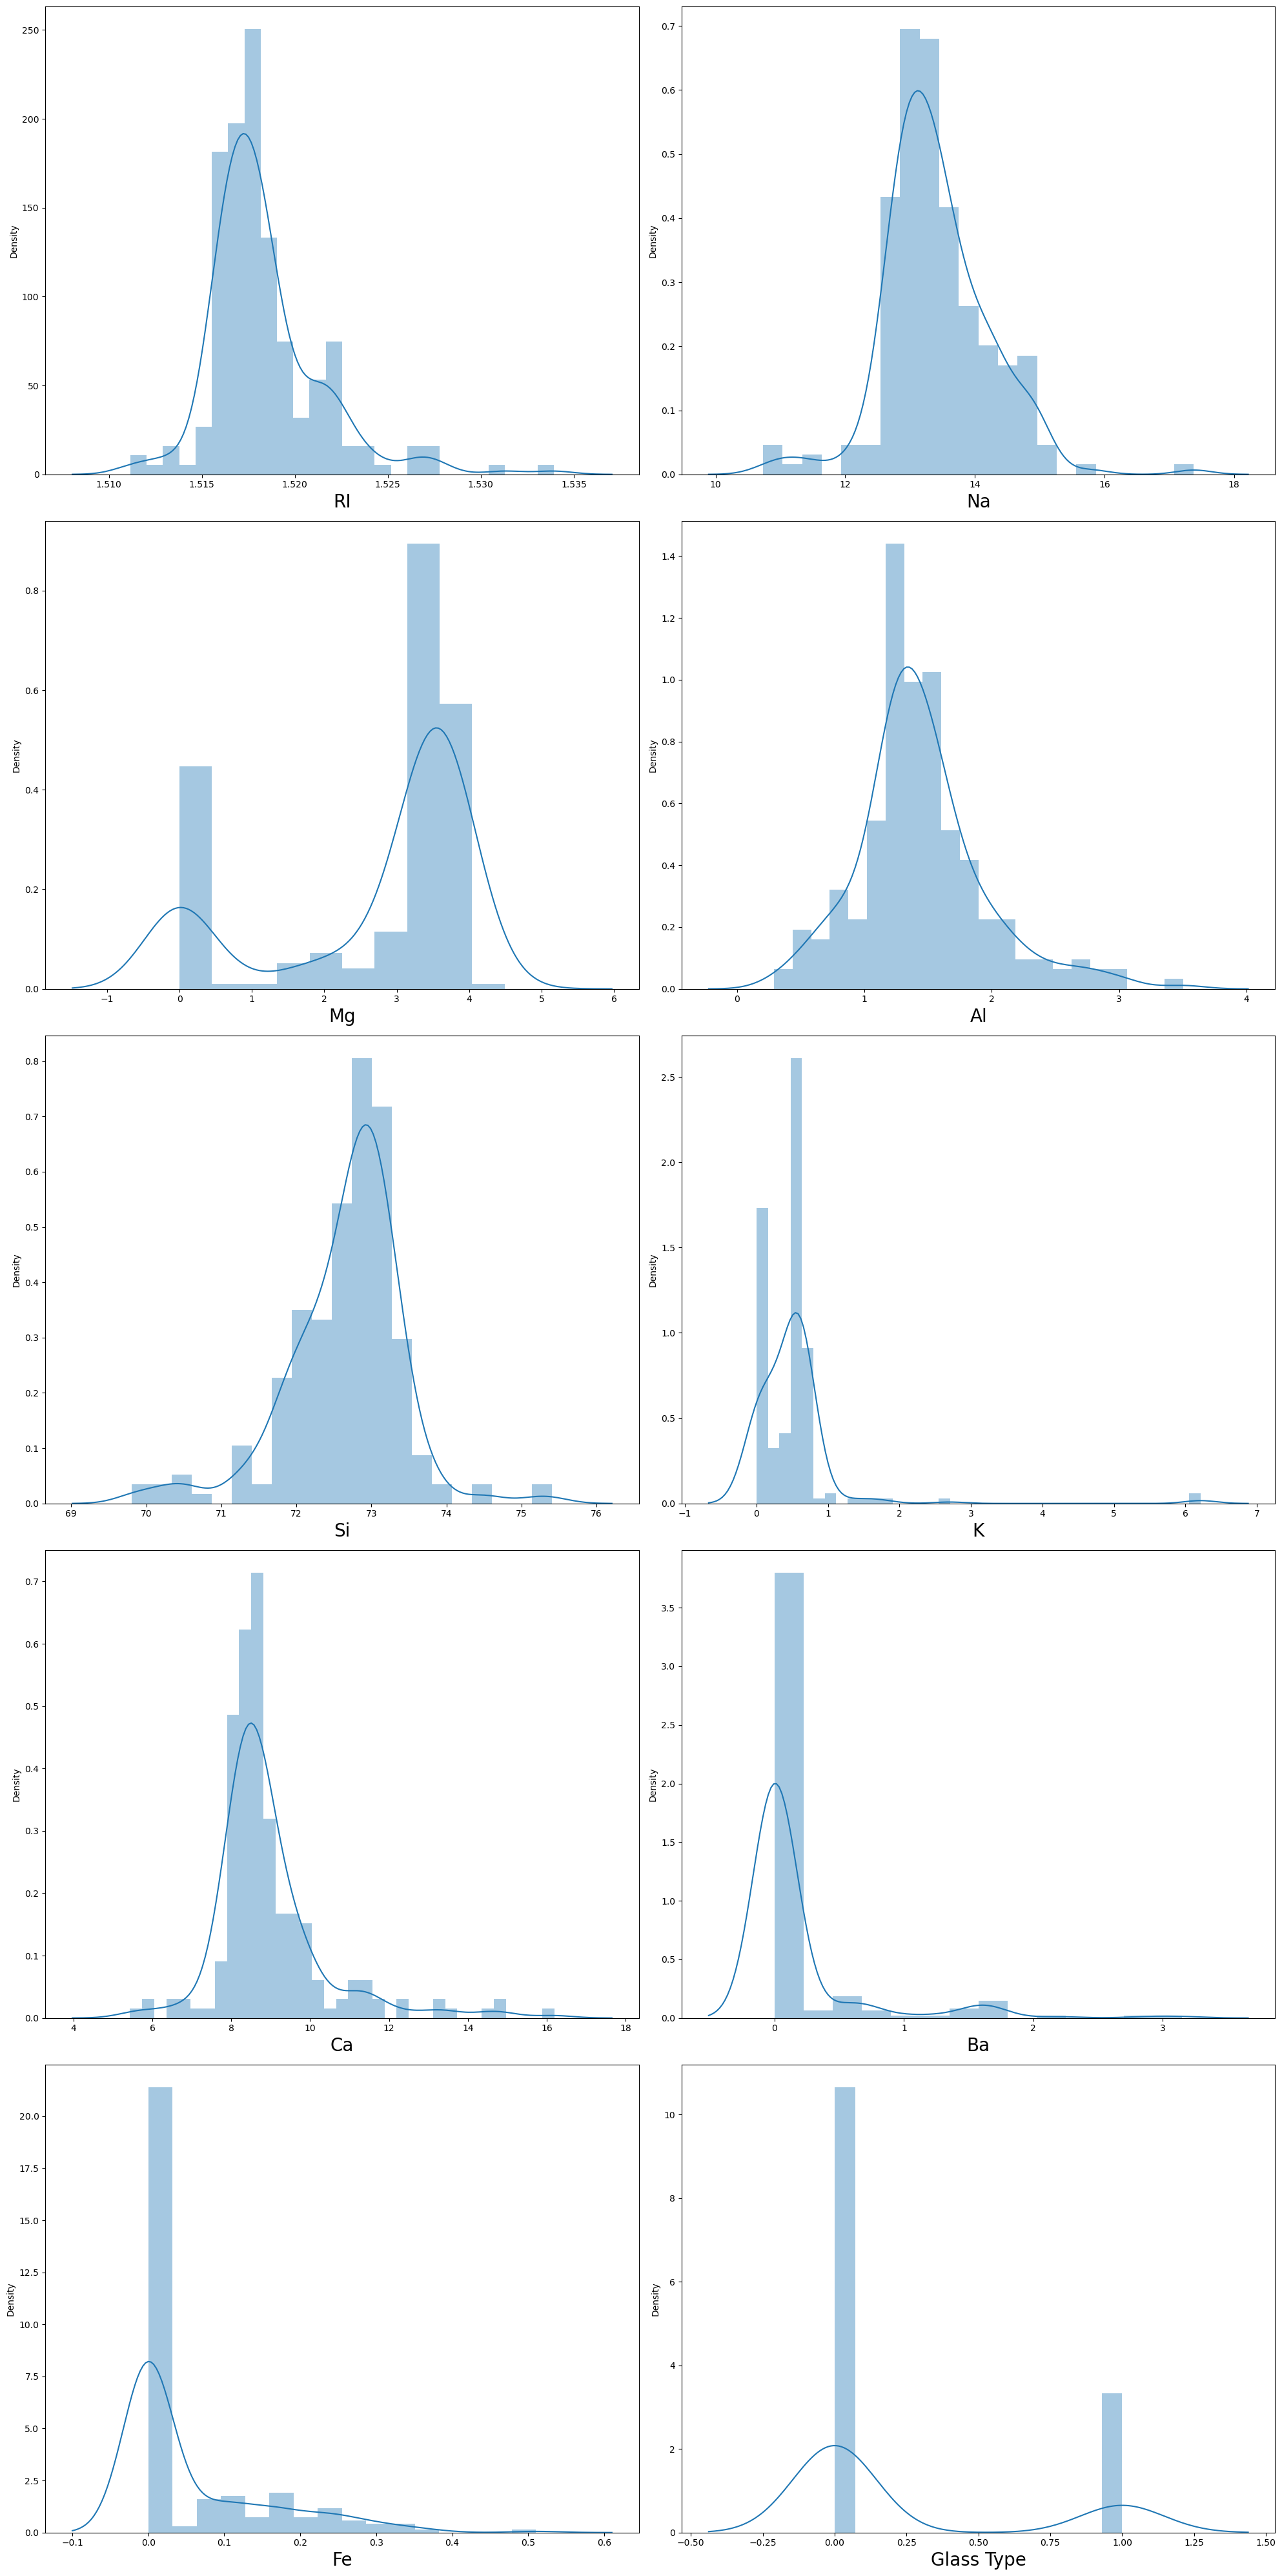

In [14]:
plt.figure(figsize=(20,40))
pn = 1
for column in df:
    
    sns.distplot(df[column],ax=plt.subplot(5,2,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()  

- As discussed earlier we can observe that K,Ca,Ba,Fe is right skewed
- Rest of the data seems normally distributed

### Bivariate analysis

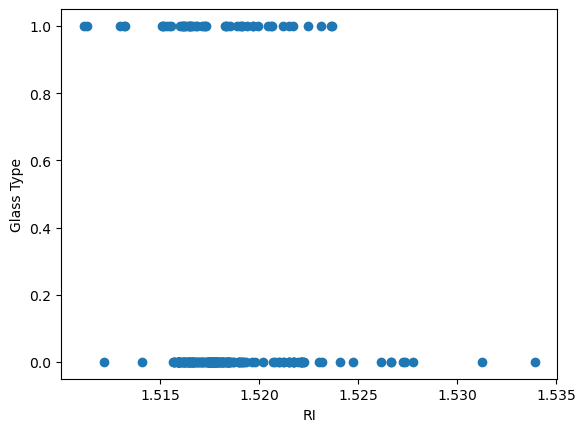

In [15]:
plt.scatter(df['RI'],df['Glass Type'])
plt.xlabel('RI')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as ri increase the glass is becoming non windowed

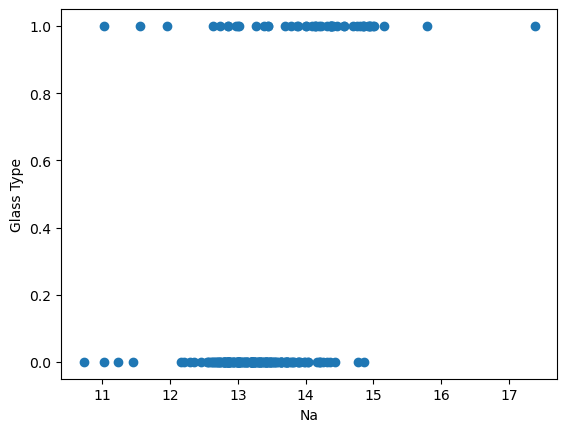

In [16]:
plt.scatter(df['Na'],df['Glass Type'])
plt.xlabel('Na')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Na  increase the glass is becoming windowed

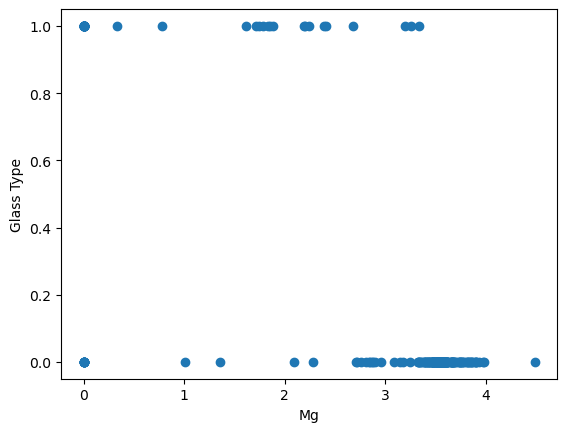

In [17]:
plt.scatter(df['Mg'],df['Glass Type'])
plt.xlabel('Mg')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Mg  increase the glass is becoming   Non-windowed

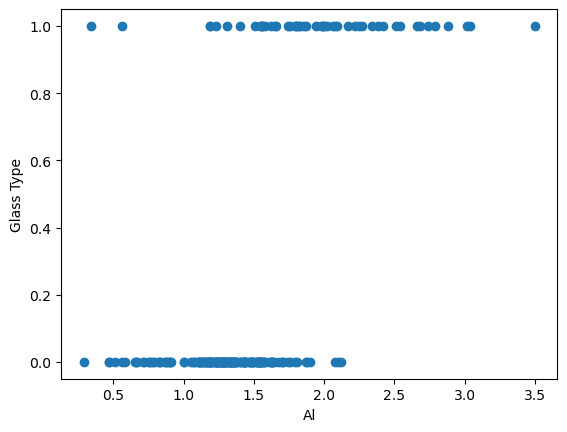

In [18]:
plt.scatter(df['Al'],df['Glass Type'])
plt.xlabel('Al')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Ai  increase the glass is becoming Windowed

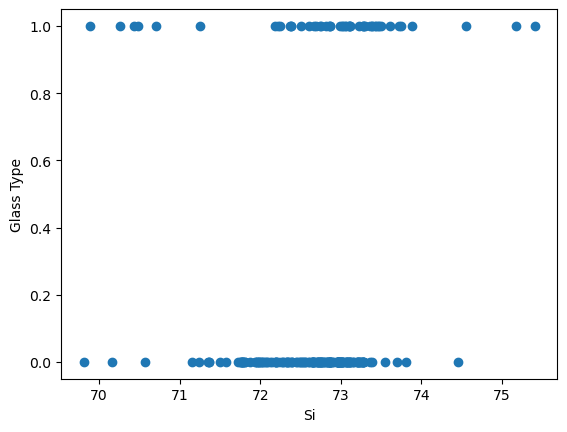

In [19]:
plt.scatter(df['Si'],df['Glass Type'])
plt.xlabel('Si')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Si And Glass type are Equally
distributed

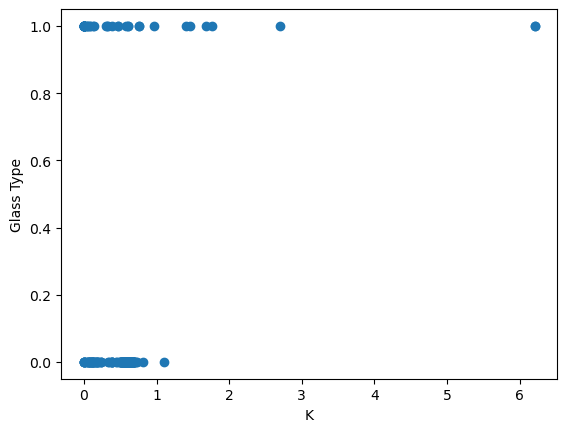

In [20]:
plt.scatter(df['K'],df['Glass Type'])
plt.xlabel('K')
plt.ylabel('Glass Type')
plt.show()

- we can observe that there is an outlier present

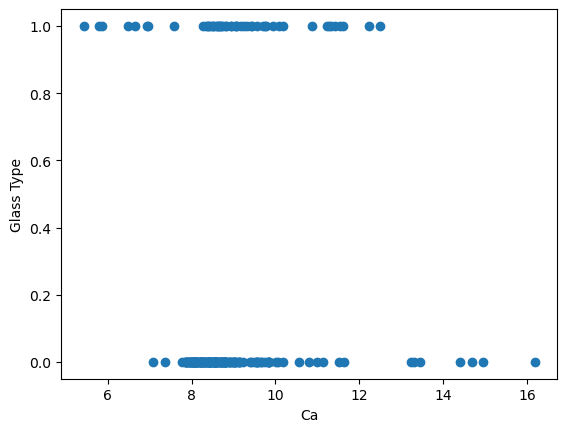

In [21]:
plt.scatter(df['Ca'],df['Glass Type'])
plt.xlabel('Ca')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Ca  increase the glass is becoming   Non-windowed

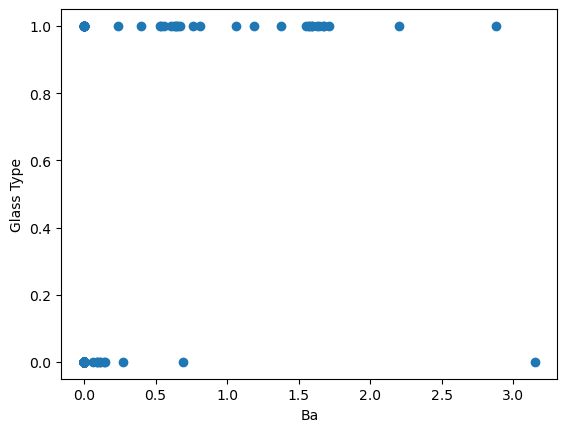

In [22]:
plt.scatter(df['Ba'],df['Glass Type'])
plt.xlabel('Ba')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Ba And Glass type are Equally distributed

In [23]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass Type'], dtype='object')

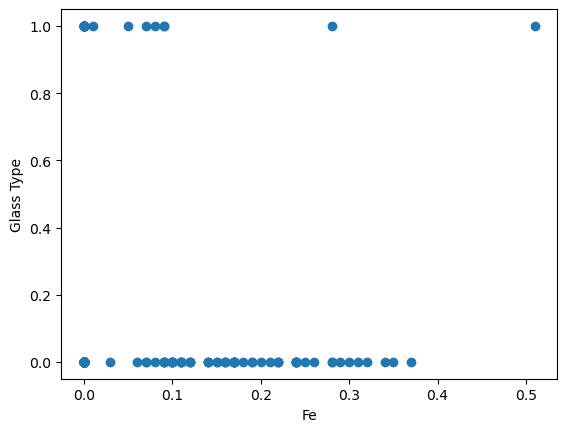

In [24]:
plt.scatter(df['Fe'],df['Glass Type'])
plt.xlabel('Fe')
plt.ylabel('Glass Type')
plt.show()

- we can observe that as Fe And Glass type are Equally distributed

### Multivariate corelation analysis

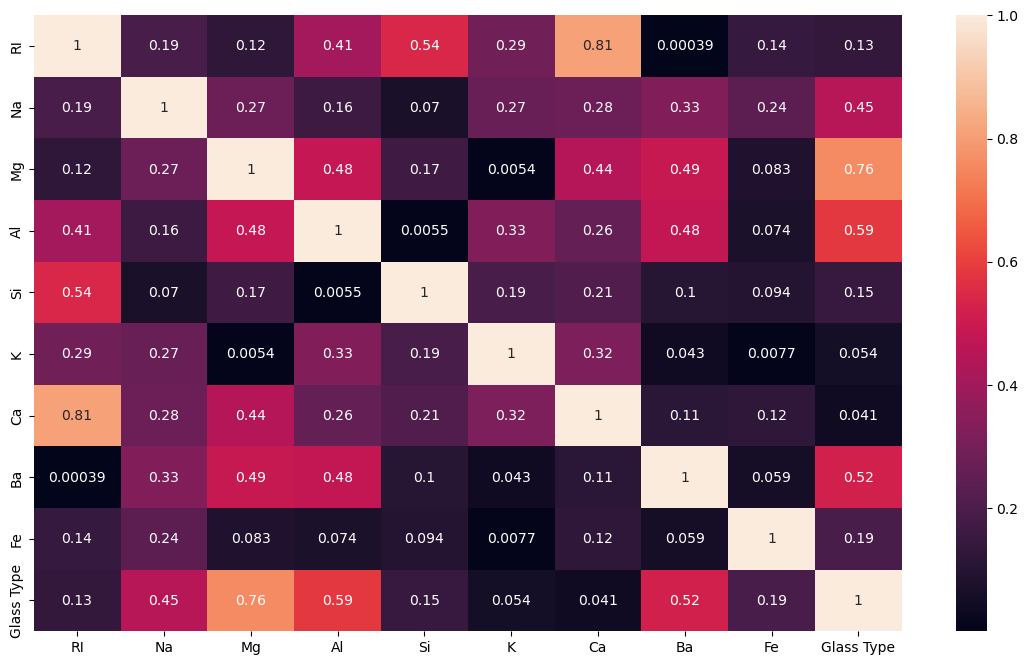

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10}) #annot display numbers(exp 0.26) in boxes and 10 is number font size
plt.show()

- It seems that there is slight multicolinearity between Ca And Ri but with general search on internet we can find that there is no such relation between tham 

- since there are less no of colums it is wise to keep them both

# Outlier Treatment

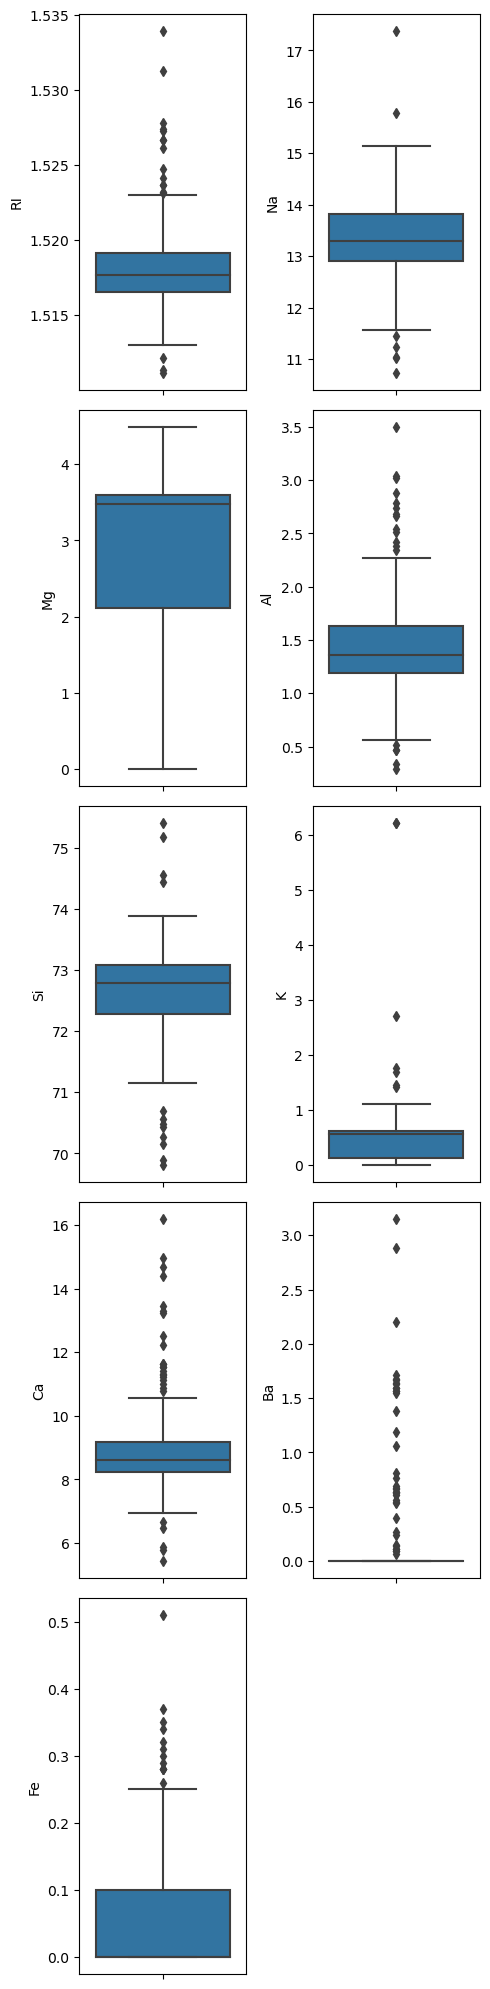

In [26]:
#checking outliers in continous data
plt.figure(figsize=(5,20))
pn = 1
for i in df.drop(columns = 'Glass Type').columns:
    if pn <= 10:
        sns.boxplot(y=df[i],ax=plt.subplot(5,2,pn))
        pn +=1
              
plt.tight_layout()            

WE can observe that there are many outliers which are needed tobe removed

since there are too many outliers we shell use z score with 3.5 as threshold

In [27]:
# using z score method
from scipy.stats import zscore
z = np.abs(zscore(df.drop(columns = 'Glass Type')))
z[z>3.5].count().sum()

17

In [28]:
x=df[z<3.5]
x['Glass Type']=df['Glass Type']

x=x.dropna()
x.shape

(203, 10)

In [29]:
df.shape

(214, 10)

In [30]:
y=x['Glass Type']
x=x.drop(columns='Glass Type')

### Skeweness

In [31]:
x.skew()

RI    1.007848
Na    0.348031
Mg   -1.378033
Al    0.626920
Si   -0.479594
K     1.804166
Ca    1.445737
Ba    2.965249
Fe    1.569903
dtype: float64

almost all columns have skeweness which needed to be fixed  using power transform

In [32]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
# box-cox since only positive skeweness

x = scaler.fit_transform(x)
x

array([[ 1.45716772e-15,  3.29855179e-01,  2.11282553e+00, ...,
        -1.68631287e-02, -4.40611287e-01, -6.84739202e-01],
       [-2.84494650e-16,  6.66294511e-01,  6.17552305e-01, ...,
        -1.05745791e+00, -4.40611287e-01, -6.84739202e-01],
       [-1.03389519e-15,  1.78689836e-01,  5.45987404e-01, ...,
        -1.12024787e+00, -4.40611287e-01, -6.84739202e-01],
       ...,
       [ 1.27675648e-15,  1.27334670e+00, -1.86651210e+00, ...,
        -3.44882608e-01,  2.43795831e+00, -6.84739202e-01],
       [-8.60422844e-16,  1.29847368e+00, -1.86651210e+00, ...,
        -3.01354324e-01,  2.43789143e+00, -6.84739202e-01],
       [-5.48172618e-16,  1.10864676e+00, -1.86651210e+00, ...,
        -1.51850663e-01,  2.43798160e+00, -6.84739202e-01]])

### Resampling training data

In [33]:
y.value_counts()

0    158
1     45
Name: Glass Type, dtype: int64

In [34]:
# using smote
from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy=0.75) # increasing data upto 75% 
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

0    158
1    118
Name: Glass Type, dtype: int64

### Train test Split

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [36]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [37]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
0,2.0,97.101449,97.101449
54,689.0,97.101449,97.101449
34,423.0,97.101449,97.101449
35,449.0,97.101449,97.101449
36,470.0,97.101449,97.101449
...,...,...,...
45,575.0,96.618357,97.101449
16,216.0,96.618357,97.101449
61,750.0,96.135266,95.652174
60,742.0,96.135266,95.652174


- we can observe that Random state 2 we get max accuracy wit minimum difference

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

### Training the model

Logistic regression 

In [39]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.9710144927536232


In [40]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  2 
Cross Validation score =  93.4782608695652 
Accuracy score 97.10144927536231


cv =  3 
Cross Validation score =  93.47826086956522 
Accuracy score 97.10144927536231


cv =  4 
Cross Validation score =  94.20289855072464 
Accuracy score 97.10144927536231


cv =  5 
Cross Validation score =  93.4935064935065 
Accuracy score 97.10144927536231


cv =  6 
Cross Validation score =  94.20289855072463 
Accuracy score 97.10144927536231


cv =  7 
Cross Validation score =  94.20329670329672 
Accuracy score 97.10144927536231


cv =  8 
Cross Validation score =  94.55882352941177 
Accuracy score 97.10144927536231


cv =  9 
Cross Validation score =  94.92234169653524 
Accuracy score 97.10144927536231



- cv = 9 is giving best result

In [41]:
cv = 9

In [42]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [43]:
lr_s_cv_score=cross_val_score(lr,x,y,cv=cv)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score_mean*100,2),'Test accuracy':round(lr_ac_score,2),'Difference':round(np.abs(lr_ac_score-(lr_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  94.92234169653524 
Accuracy score =  97.10144927536231 
Difference =  2.1791075788270717


##### Random  forest classifer

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

97.10144927536231


In [45]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x,y,cv=cv)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score,2),'Difference':round(np.abs(rfc_ac_score-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  94.8984468339307 
Accuracy score =  97.10144927536231 
Difference =  -2.2030024414316074


##### AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

94.20289855072464


In [47]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x,y,cv=cv)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)
ms_df = ms_df.append({'Model':'Adaboost classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score,2),'Difference':round(np.abs(abc_ac_score-(abc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  92.77180406212663 
Accuracy score =  94.20289855072464 
Difference =  -1.4310944885980064


##### GradientBoostingClassifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_test_pred=gbc.predict(x_test)
gbc_ac_score = accuracy_score(y_test,gbc_test_pred)*100
print (gbc_ac_score)

95.65217391304348


In [49]:
# cross validation
gbc_s_cv_score=cross_val_score(gbc,x,y,cv=cv)
gbc_s_cv_score_mean = gbc_s_cv_score.mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score,'\nDifference = ',(gbc_s_cv_score_mean*100)-gbc_ac_score)
ms_df = ms_df.append({'Model':'Gradient boosting classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score,2),'Difference':round(np.abs(gbc_ac_score-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  94.93428912783753 
Accuracy score =  95.65217391304348 
Difference =  -0.7178847852059533


##### XGBClassifier

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)

97.10144927536231


In [51]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x,y,cv=cv)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)
ms_df = ms_df.append({'Model':'XGBOOST classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score,2),'Difference':round(np.abs(xgb_ac_score-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  95.62724014336916 
Accuracy score =  97.10144927536231 
Difference =  -1.474209131993149


##### SVC

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_test_pred=svc.predict(x_test)
svc_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (svc_ac_score)

98.55072463768117


In [53]:
# cross validation
svc_s_cv_score=cross_val_score(svc,x,y,cv=cv)
svc_s_cv_score_mean = svc_s_cv_score.mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score,'\nDifference = ',(svc_s_cv_score_mean*100)-svc_ac_score)
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score,2),'Difference':round(np.abs(svc_ac_score-(svc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  96.71445639187576 
Accuracy score =  98.55072463768117 
Difference =  -1.8362682458054138


##### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_test_pred=svc.predict(x_test)
knn_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (knn_ac_score)

98.55072463768117


In [55]:
# cross validation
knn_s_cv_score=cross_val_score(knn,x,y,cv=cv)
knn_s_cv_score_mean = knn_s_cv_score.mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score,'\nDifference = ',(knn_s_cv_score_mean*100)-knn_ac_score)
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score,2),'Difference':round(np.abs(knn_ac_score-(knn_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  95.26881720430107 
Accuracy score =  98.55072463768117 
Difference =  -3.2819074333800984


In [56]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
5,SVC,96.71,98.55,1.84
6,KNN Classifier,95.27,98.55,3.28
0,Logistic regression,94.92,97.10,2.18
1,Random forest classifier,94.90,97.10,2.20
4,XGBOOST classifier,95.63,97.10,1.47
3,Gradient boosting classifier,94.93,95.65,0.72
2,Adaboost classifier,92.77,94.20,1.43


- we can observe that Support vector classifier is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': [ 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4,5],
    'coef0': [0.0, 0.5, 1.0]
}

In [58]:
# using grid search cv
gcv = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=cv)
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'C': 0.1, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.9710144927536233


# Training with best parms

In [59]:
final_model = SVC(C=1,coef0= 0.0, degree= 3, gamma= 'scale', kernel= 'rbf')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

98.55072463768117


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      1.00      0.98        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



#### roc curve

In [61]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [62]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.02222222 1.        ] 
tpr =  [0. 1. 1.] 
threshold =  [2 1 0]


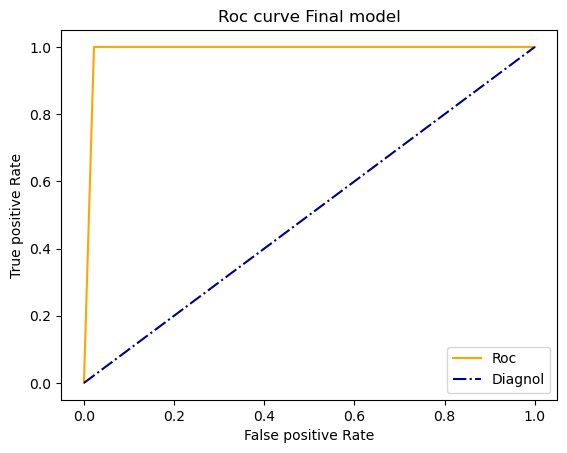

In [63]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [64]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

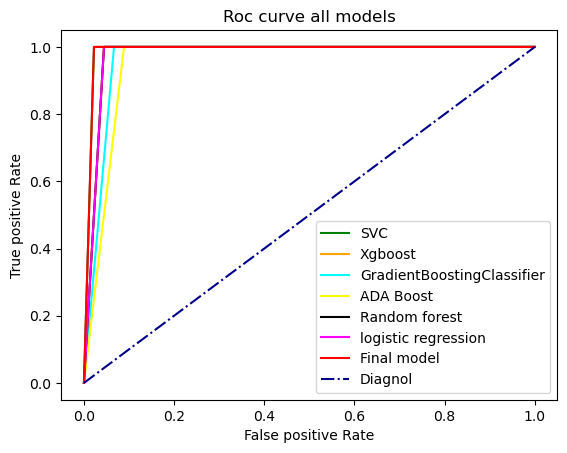

In [65]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc_test_pred)
fpr3,tpr3,threshold = roc_curve(y_test,xgb_test_pred)
fpr4,tpr4,threshold = roc_curve(y_test,gbc_test_pred)
fpr5,tpr5,threshold = roc_curve(y_test,abc_test_pred)
fpr6,tpr6,threshold = roc_curve(y_test,rfc_test_pred)
fpr7,tpr7,threshold = roc_curve(y_test,lr_test_pred)



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='magenta',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [66]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## Conclusion 

##### 1. For this problem we can observe that almost all models gave close results but svc gave best results with least overfitting